In [11]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
diamonds_data = sns.load_dataset('diamonds')
diamonds_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


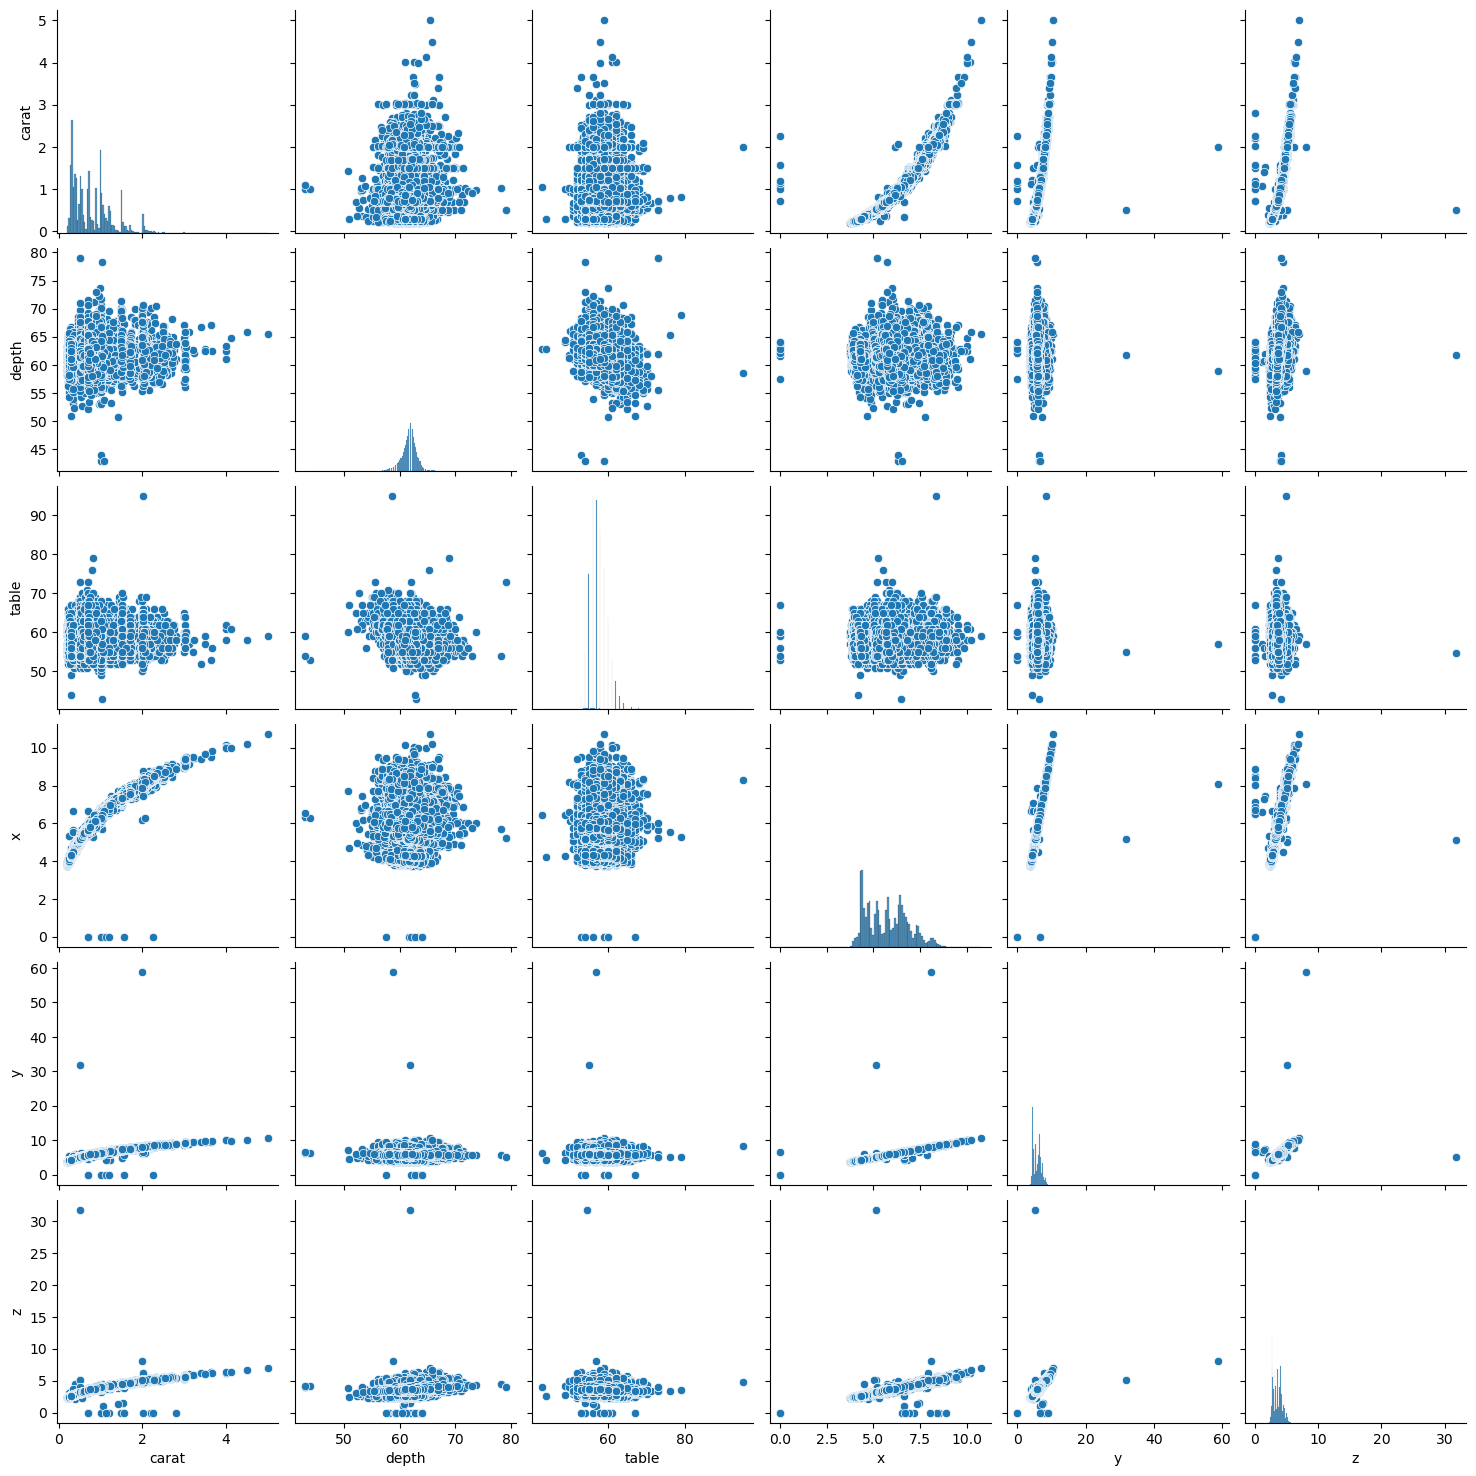

In [13]:
sns.pairplot(diamonds_data, vars=["carat", "depth", "table", "x", "y", "z"])
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


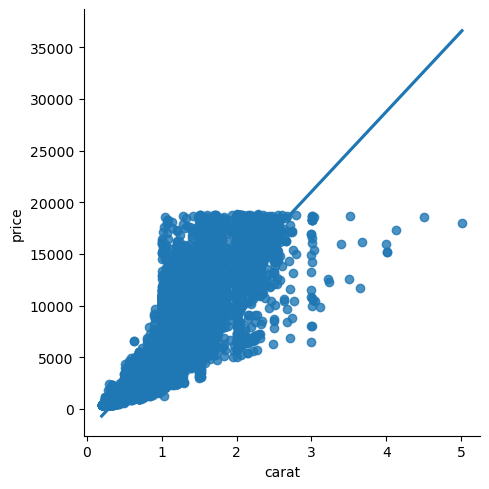

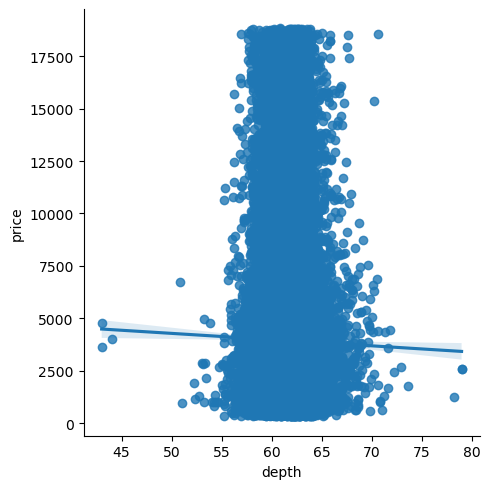

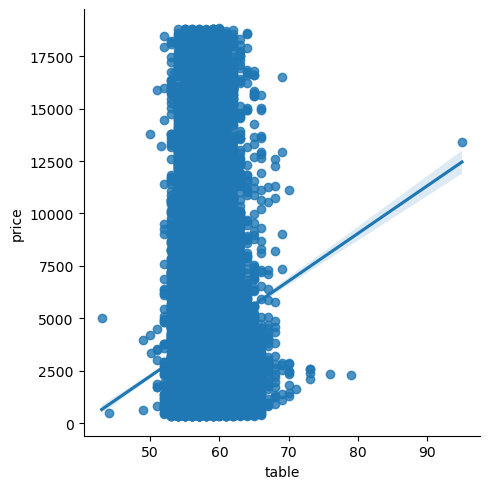

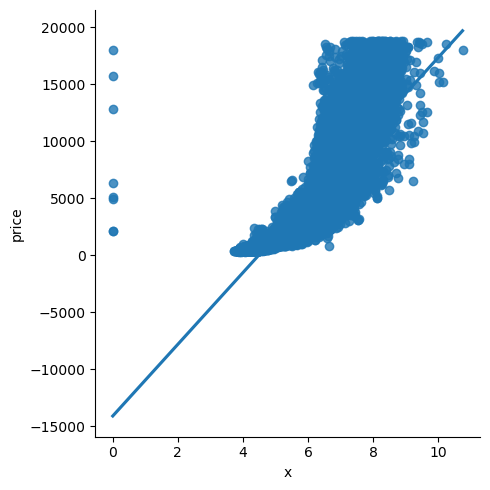

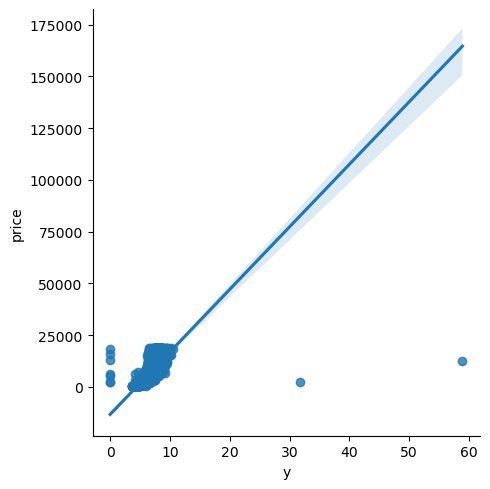

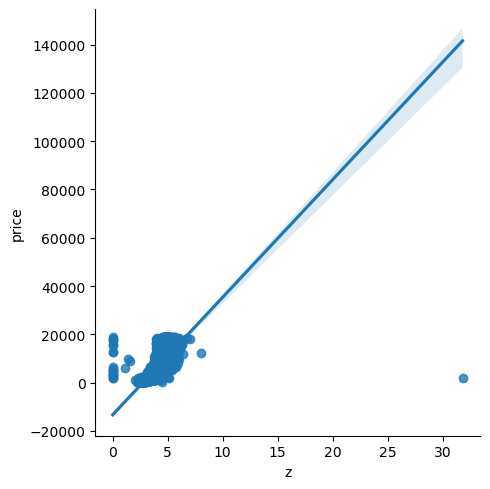

In [14]:
sns.lmplot(x="carat", y="price", data=diamonds_data)
sns.lmplot(x="depth", y="price", data=diamonds_data)
sns.lmplot(x="table", y="price", data=diamonds_data)
sns.lmplot(x="x", y="price", data=diamonds_data)
sns.lmplot(x="y", y="price", data=diamonds_data)
sns.lmplot(x="z", y="price", data=diamonds_data)

plt.show()

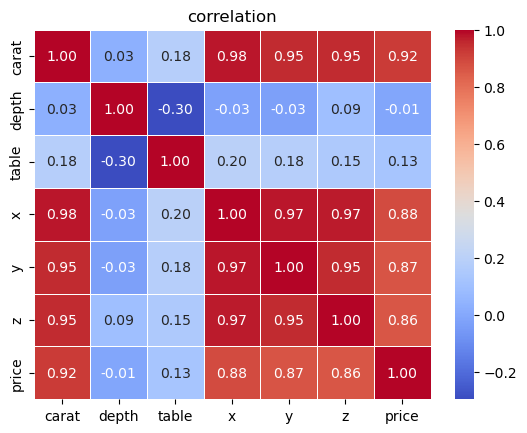

In [22]:
correlation = diamonds_data[["carat", "depth", "table", "x", "y", "z", "price"]].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("correlation")
plt.show()

Carat dan Price:\
Terdapat korelasi positif yang signifikan antara "carat" dan "price" (0.92). Hal ini menunjukkan bahwa semakin besar karatnya, semakin tinggi harga berlian.

Depth dan Price:\
Korelasi antara "depth" dan "price" terlihat cukup rendah (0.01), menunjukkan hubungan yang lemah atau bahkan bisa dikatakan tidak ada korelasi yang signifikan antara kedalaman dan harga berlian.

Table dan Price:\
Korelasi antara "table" dan "price" juga terlihat rendah (-0.13). Ini menunjukkan bahwa tidak ada korelasi kuat antara lebar atas meja dan harga berlian.

X, Y, Z, dan Price:\
Korelasi antara dimensi "x", "y", "z", dan "price" cenderung positif, tetapi tidak sangat kuat. Hal ini menunjukkan bahwa dimensi fisik berlian juga berkontribusi terhadap harga, tetapi tidak sekuat karat.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = diamonds_data[["carat", "depth", "table", "x", "y", "z"]]
y = diamonds_data["price"]

# Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Mencetak koefisien regresi
print("Coefficients:", model.coef_)

# Mencetak intercept
print("Intercept:", model.intercept_)

 
print("R^2 Score:", model.score(X_test, y_test))

Coefficients: [10683.18425966  -204.09955335  -104.26736872 -1286.79957429
    37.63252069    53.39486424]
Intercept: 20976.56373603736
R^2 Score: 0.8589542625888938


In [28]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:28:29   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.085e+04    447.562     46.584      0.0

Carat : Koefisien carat adalah sekitar 10690. Ini berarti bahwa setiap peningkatan satu unit dalam carat diamond diharapkan meningkatkan harga sekitar 10690 unit.

Depth : Koefisien depth adalah -203.1541. Ini menunjukkan bahwa setiap peningkatan satu unit dalam kedalaman diamond dihubungkan dengan penurunan rata-rata sekitar 203 unit dalam harga.

Table : Koefisien table adalah -102.4457. Ini berarti bahwa setiap peningkatan satu unit dalam lebar atas meja diamond dihubungkan dengan penurunan rata-rata sekitar 102 unit dalam harga.

X, Y, Z: Variabel-variabel ini memiliki koefisien regresi masing-masing dan dapat diinterpretasikan dengan cara yang sama seperti carat,depth,table

In [29]:
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 2240581.729542735
Root Mean Squared Error (RMSE): 1496.8572842935746
R-squared (R²): 0.8592186831580986


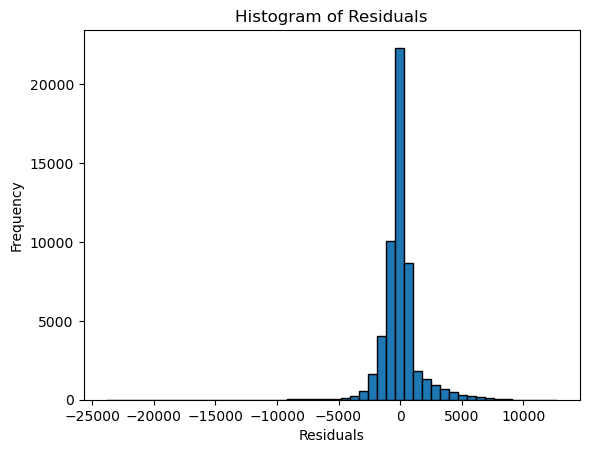

In [31]:
residual = y - y_pred

plt.hist(residual, bins=50, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

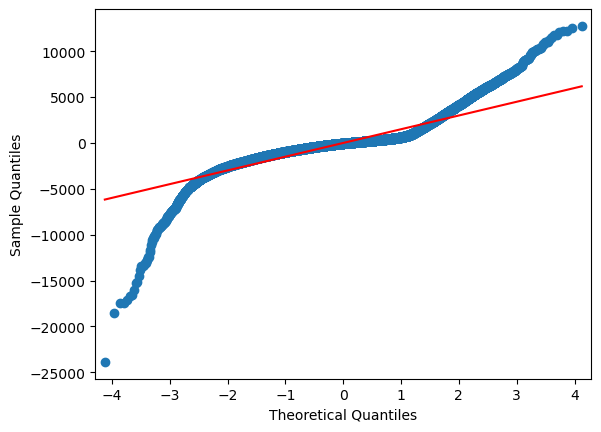

In [33]:
sm.qqplot(residual, line='s')
plt.show()

Secara keseluruhan, hasil analisis error menunjukkan bahwa model regresi linear yang telah dibuat cukup baik dalam menangkap pola dalam data. Distribusi residual mendekati normal, dan tidak ada pola yang mencolok dalam plot residual.